In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
quality = df["quality"].values
category = []
for num in quality:
    if num<2:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [4]:
#Create new data
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid


Mid     1382
Good     217
Name: category, dtype: int64

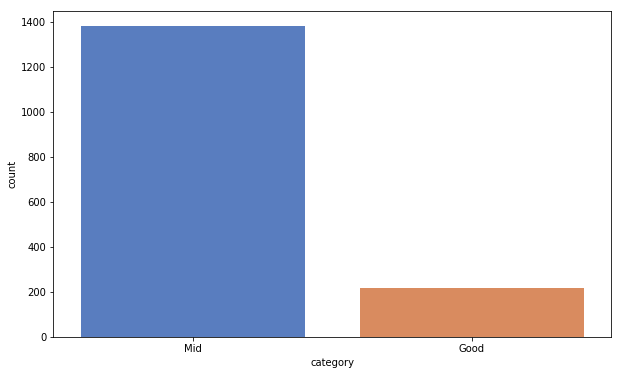

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

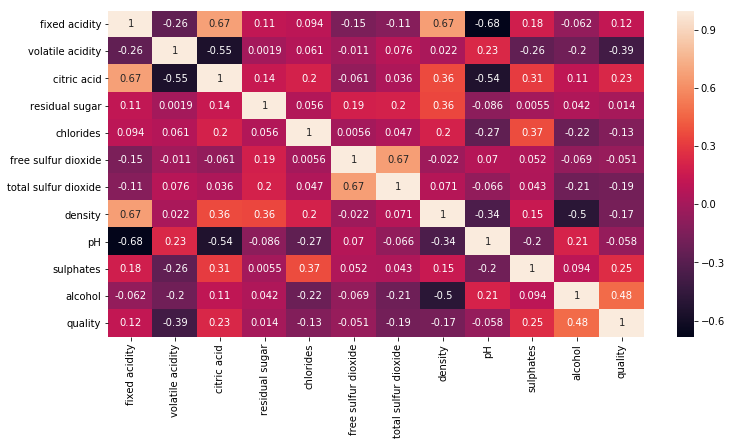

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["quality"],y=df["fixed acidity],palette="Reds")

SyntaxError: invalid syntax (<ipython-input-20-6e5003db2593>, line 2)

<Figure size 864x432 with 0 Axes>

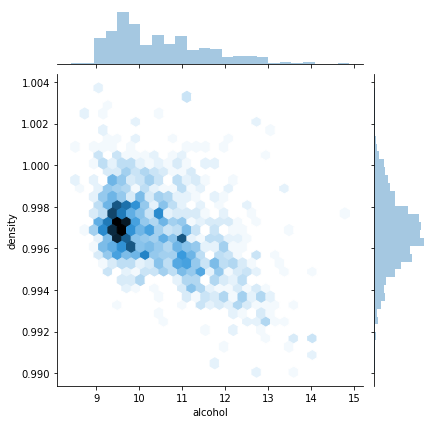

In [8]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex")

In [10]:
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.64      0.30      0.41        30
           1       0.93      0.98      0.96       290

   micro avg       0.92      0.92      0.92       320
   macro avg       0.79      0.64      0.68       320
weighted avg       0.90      0.92      0.91       320



In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        30
           1       0.96      0.96      0.96       290

   micro avg       0.93      0.93      0.93       320
   macro avg       0.79      0.78      0.79       320
weighted avg       0.93      0.93      0.93       320



In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        30
           1       0.96      0.95      0.95       290

   micro avg       0.92      0.92      0.92       320
   macro avg       0.75      0.76      0.76       320
weighted avg       0.92      0.92      0.92       320



In [18]:
conclusion = pd.DataFrame({'models': ["SVC","Random Forest","KNN"],
                           'accuracies': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_knn)]})
conclusion

,models,accuracies
0,SVC,0.918750
1,Random Forest,0.928125
2,KNN,0.915625
